# **Prequisite**

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import cv2
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models
from tensorflow.keras import backend as K
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
#DATA PREPARATION
folder_path = "dataset/dataset"
os.listdir(folder_path)

classes = ["cardboard", "glass", "metal", "paper", "plastic", "trash"]
data = []
for c in classes:
    i = classes.index(c)
    path = os.path.join(folder_path, c)
    for img in os.listdir(path):
        im = cv2.imread(os.path.join(path, img))
        im = cv2.resize(im, (224, 224))
        data.append([im, i])
data = np.array(data, dtype="object")

import random
random.shuffle(data)
X = []
Y = []
for x, y in data:
    X.append(x)
    Y.append(y)
x = np.array(X)
y = np.array(Y)
print(x.shape, y.shape)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=4, stratify=y)
x_train = x_train / 255.0
x_test = x_test / 255.0

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)





(2527, 224, 224, 3) (2527,)
(1516, 224, 224, 3) (1516,)
(1011, 224, 224, 3) (1011,)


In [108]:
#BUILD  RESNET50V2 MODEL
model_resNet50V2=tf.keras.applications.resnet_v2.ResNet50V2(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)

base_input2=model_resNet50V2.layers[0].input
base_output2=model_resNet50V2.layers[-2].output

final_output2 = layers.Dense(240)(base_output2) 
final_output2 = layers.Activation('relu')(final_output2) 
final_output2 = layers.Dense(128)(final_output2)
final_output2 = layers.Activation('relu')(final_output2)
final_output2 = layers.Dense(64)(final_output2)
final_output2 = layers.Activation('relu')(final_output2)
final_output2 = layers.Dense(6, activation='softmax')(final_output2) 

new_model_resNet50V2 = tf.keras.Model(inputs = base_input2, outputs = final_output2)
new_model_resNet50V2.compile(loss="sparse_categorical_crossentropy", optimizer = "SGD", metrics = ["accuracy"])


In [109]:
#TRAIN MOBILE NET MODEL
result=new_model_resNet50V2.fit(x_train, y_train, epochs = 20,validation_data=(x_test, y_test))


Epoch 1/20
48/48 [==============================] - 275s 5s/step - loss: 0.9027 - accuracy: 0.7164 - val_loss: 0.5867 - val_accuracy: 0.7943
Epoch 2/20
48/48 [==============================] - 244s 5s/step - loss: 0.3108 - accuracy: 0.9103 - val_loss: 0.3700 - val_accuracy: 0.8823
Epoch 3/20
48/48 [==============================] - 232s 5s/step - loss: 0.1464 - accuracy: 0.9644 - val_loss: 0.3267 - val_accuracy: 0.9050
Epoch 4/20
48/48 [==============================] - 241s 5s/step - loss: 0.0771 - accuracy: 0.9868 - val_loss: 0.2415 - val_accuracy: 0.9169
Epoch 5/20
48/48 [==============================] - 236s 5s/step - loss: 0.0426 - accuracy: 0.9954 - val_loss: 0.2292 - val_accuracy: 0.9209
Epoch 6/20
48/48 [==============================] - 238s 5s/step - loss: 0.0296 - accuracy: 0.9980 - val_loss: 0.2142 - val_accuracy: 0.9179
Epoch 7/20
48/48 [==============================] - 243s 5s/step - loss: 0.0189 - accuracy: 0.9980 - val_loss: 0.2111 - val_accuracy: 0.9209
Epoch 8/20
48

32/32 [==============================] - 32s 982ms/step
Classification Report:
              precision    recall  f1-score   support

   cardboard       0.95      1.00      0.97       462
       glass       0.94      0.96      0.95       278
       metal       0.89      0.86      0.87       134
       paper       0.92      0.81      0.86       104
     plastic       0.74      0.55      0.63        31
       trash       0.00      0.00      0.00         2

    accuracy                           0.93      1011
   macro avg       0.74      0.70      0.71      1011
weighted avg       0.93      0.93      0.93      1011



c:\Users\bcamaster\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\bcamaster\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\bcamaster\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

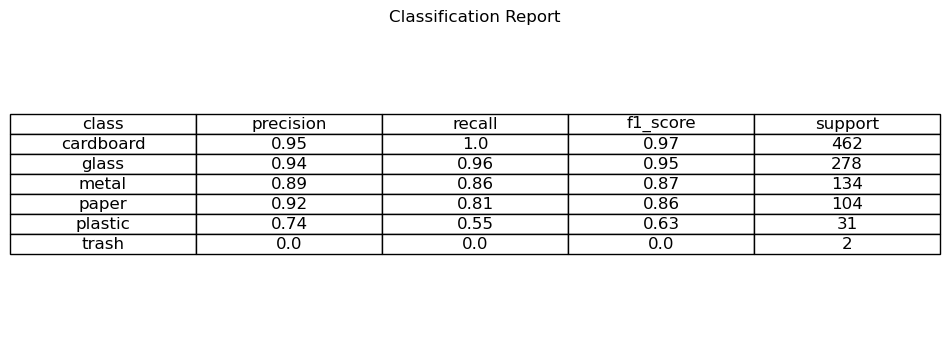

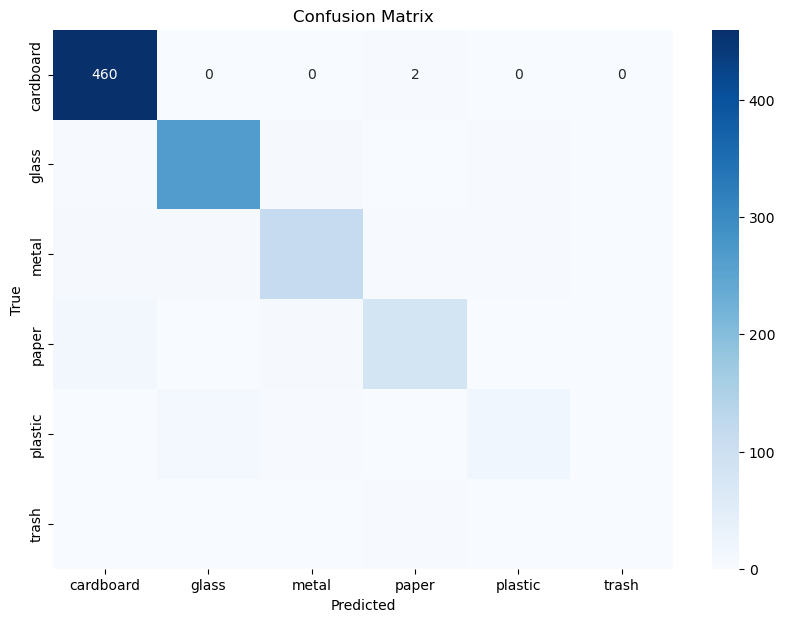

In [136]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



# EVALUATE AND VISUALIZE RESULTS
y_pred = new_model_resNet50V2.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate classification report
report = classification_report(y_test, y_pred_classes, target_names=classes,digits=4)
print("Classification Report:")
print(report)

# Plot classification report
def plot_classification_report(report, title='Classification Report'):
    report_data = []
    lines = report.split('\n')
    for line in lines[2:-3]:
        row_data = line.split()
        if len(row_data) == 5:  # Check if the line contains all necessary data
            row = {}
            row['class'] = row_data[0]
            row['precision'] = float(row_data[1])
            row['recall'] = float(row_data[2])
            row['f1_score'] = float(row_data[3])
            row['support'] = int(row_data[4])
            report_data.append(row)
    dataframe = pd.DataFrame.from_dict(report_data)

    fig, ax = plt.subplots(1, 1, figsize=(10, 4))
    ax.axis('tight')
    ax.axis('off')
    table = ax.table(cellText=dataframe.values, colLabels=dataframe.columns, cellLoc='center', loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.2, 1.2)
    plt.title(title)
    plt.show()

plot_classification_report(report)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


32/32 [==============================] - 30s 915ms/step
Classification Report:
              precision    recall  f1-score   support

   cardboard       0.95      1.00      0.97       462
       glass       0.94      0.96      0.95       278
       metal       0.89      0.86      0.87       134
       paper       0.92      0.81      0.86       104
     plastic       0.74      0.55      0.63        31
       trash       0.00      0.00      0.00         2

    accuracy                           0.93      1011
   macro avg       0.74      0.70      0.71      1011
weighted avg       0.93      0.93      0.93      1011



c:\Users\bcamaster\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\bcamaster\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\bcamaster\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

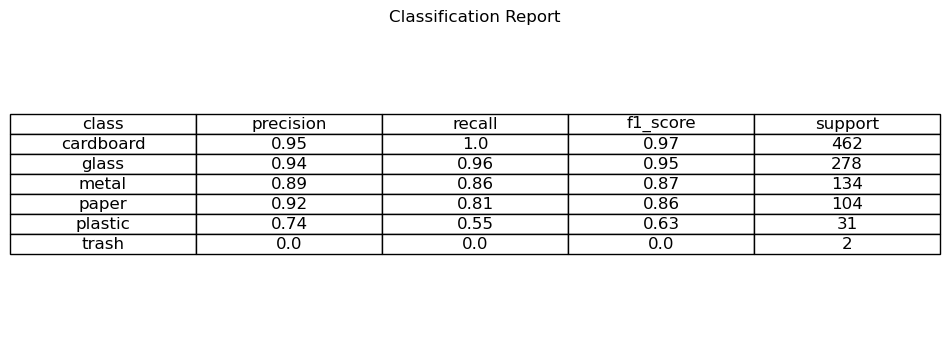

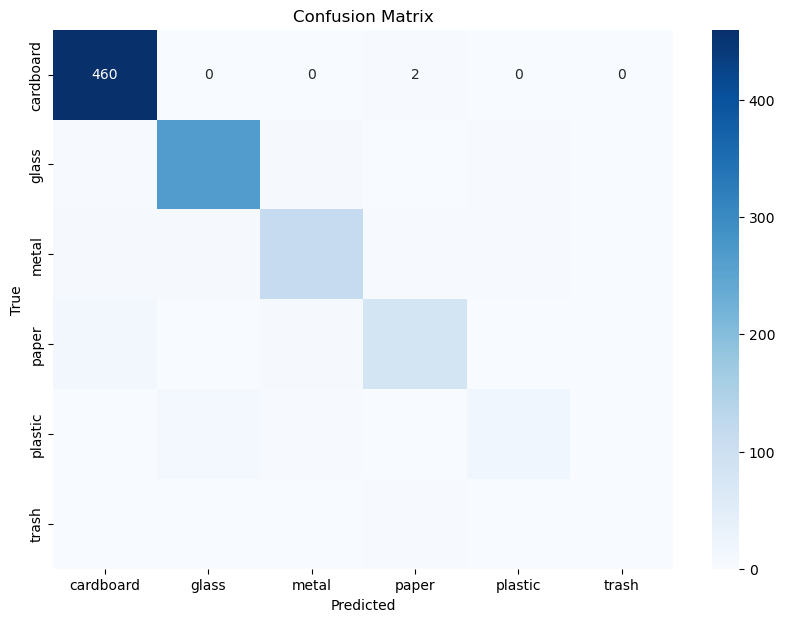

In [138]:
# EVALUATE AND VISUALIZE RESULTS
y_pred = new_model_resNet50V2.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate classification report
report = classification_report(y_test, y_pred_classes, target_names=classes)
print("Classification Report:")
print(report)

# Plot classification report
def plot_classification_report(report, title='Classification Report'):
    report_data = []
    lines = report.split('\n')
    for line in lines[2:-3]:
        row_data = line.split()
        if len(row_data) == 5:  # Check if the line contains all necessary data
            row = {}
            row['class'] = row_data[0]
            row['precision'] = float(row_data[1])
            row['recall'] = float(row_data[2])
            row['f1_score'] = float(row_data[3])
            row['support'] = int(row_data[4])
            report_data.append(row)
    dataframe = pd.DataFrame.from_dict(report_data)

    fig, ax = plt.subplots(1, 1, figsize=(10, 4))
    ax.axis('tight')
    ax.axis('off')
    table = ax.table(cellText=dataframe.values, colLabels=dataframe.columns, cellLoc='center', loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.2, 1.2)
    plt.title(title)
    plt.show()

plot_classification_report(report)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Adjust figure size to ensure it fits all values
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

32/32 [==============================] - 30s 925ms/step
Classification Report:
              precision    recall  f1-score   support

   cardboard       0.95      1.00      0.97       462
       glass       0.94      0.96      0.95       278
       metal       0.89      0.86      0.87       134
       paper       0.92      0.81      0.86       104
     plastic       0.74      0.55      0.63        31
       trash       0.00      0.00      0.00         2

    accuracy                           0.93      1011
   macro avg       0.74      0.70      0.71      1011
weighted avg       0.93      0.93      0.93      1011



c:\Users\bcamaster\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\bcamaster\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\bcamaster\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

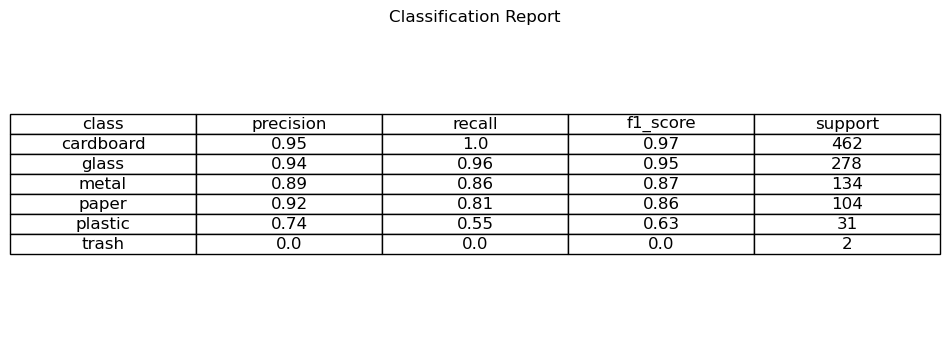

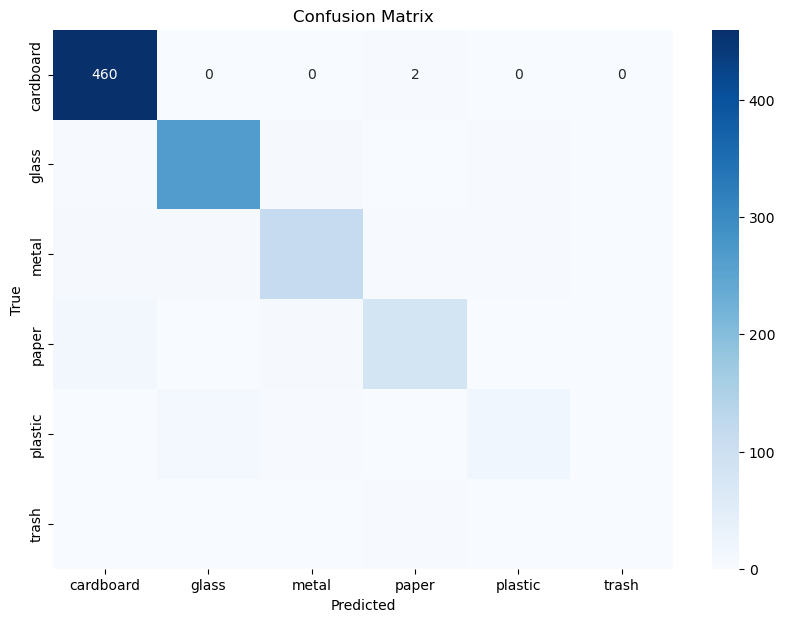

In [139]:
# EVALUATE AND VISUALIZE RESULTS
y_pred = new_model_resNet50V2.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate classification report
report = classification_report(y_test, y_pred_classes, target_names=classes)
print("Classification Report:")
print(report)

# Plot classification report
def plot_classification_report(report, title='Classification Report'):
    report_data = []
    lines = report.split('\n')
    for line in lines[2:-3]:
        row_data = line.split()
        if len(row_data) >= 5:  # Check if the line contains all necessary data
            row = {}
            row['class'] = row_data[0]
            row['precision'] = float(row_data[1])
            row['recall'] = float(row_data[2])
            row['f1_score'] = float(row_data[3])
            row['support'] = int(row_data[4])
            report_data.append(row)
    dataframe = pd.DataFrame.from_dict(report_data)

    fig, ax = plt.subplots(1, 1, figsize=(10, 4))
    ax.axis('tight')
    ax.axis('off')
    table = ax.table(cellText=dataframe.values, colLabels=dataframe.columns, cellLoc='center', loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.2, 1.2)
    plt.title(title)
    plt.show()

plot_classification_report(report)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Adjust figure size to ensure it fits all values
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [140]:
#VISUALIZE TRAINING RESULT
# Evaluasi dan hitung metrik tambahan
y_pred = new_model_resNet50V2.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print("Classification Report resNEt50V2:")
print(classification_report(y_test, y_pred_classes, target_names=classes))

print("Confusion Matrix resNEt50V2:")

print(confusion_matrix(y_test, y_pred_classes))

32/32 [==============================] - 31s 961ms/step
Classification Report:
              precision    recall  f1-score   support

   cardboard       0.95      1.00      0.97       462
       glass       0.94      0.96      0.95       278
       metal       0.89      0.86      0.87       134
       paper       0.92      0.81      0.86       104
     plastic       0.74      0.55      0.63        31
       trash       0.00      0.00      0.00         2

    accuracy                           0.93      1011
   macro avg       0.74      0.70      0.71      1011
weighted avg       0.93      0.93      0.93      1011

Confusion Matrix:
[[460   0   0   2   0   0]
 [  2 267   6   0   3   0]
 [  7   6 115   3   3   0]
 [ 13   1   6  84   0   0]
 [  1  11   2   0  17   0]
 [  0   0   0   2   0   0]]


c:\Users\bcamaster\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\bcamaster\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\bcamaster\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

Confusion Matrix:
[[460   0   0   2   0   0]
 [  2 267   6   0   3   0]
 [  7   6 115   3   3   0]
 [ 13   1   6  84   0   0]
 [  1  11   2   0  17   0]
 [  0   0   0   2   0   0]]


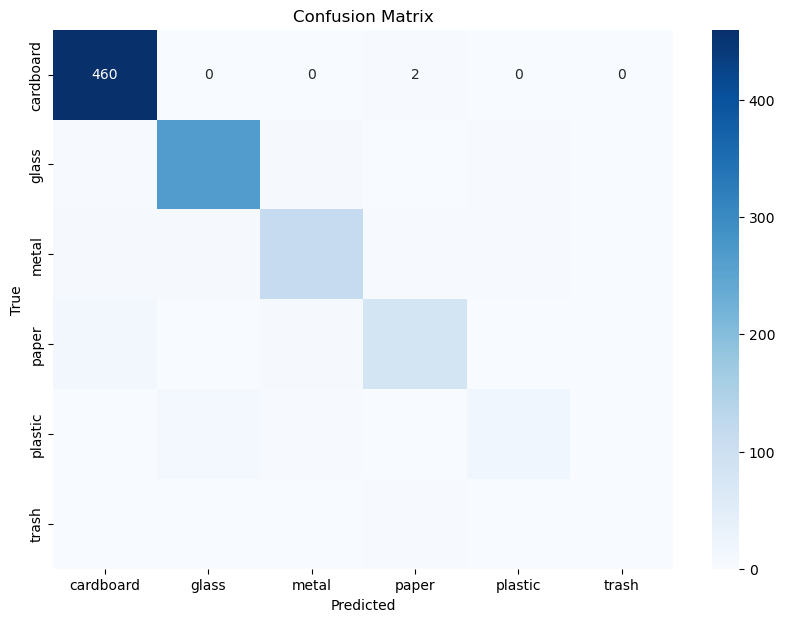

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred_classes)
print(cm)

# VISUALIZE CONFUSION MATRIX
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

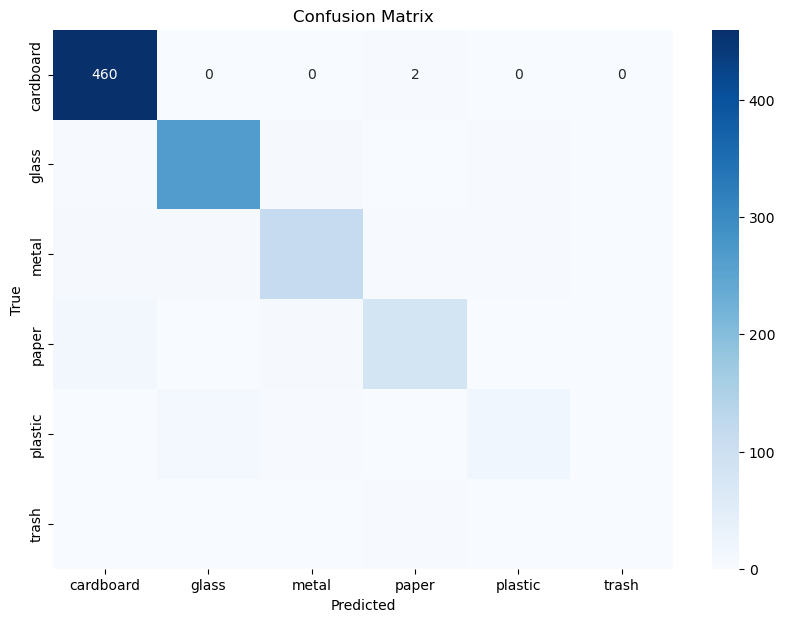

In [130]:
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [3]:
#BUILD DENSE NET169
model_denseNet169=tf.keras.applications.densenet.DenseNet169(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)
base_input3=model_denseNet169.layers[0].input
base_output3=model_denseNet169.layers[-2].output

final_output3 = layers.Dense(240)(base_output3) 
final_output3 = layers.Activation('relu')(final_output3) 
final_output3 = layers.Dense(128)(final_output3) 
final_output3 = layers.Activation('relu')(final_output3) 
final_output3 = layers.Dense(64)(final_output3)
final_output3 = layers.Activation('relu')(final_output3)
final_output3 = layers.Dense(6, activation='softmax')(final_output3) 

new_model_denseNet169 = tf.keras.Model(inputs = base_input3, outputs = final_output3)

new_model_denseNet169.compile(loss="sparse_categorical_crossentropy", optimizer = "SGD", metrics = ["accuracy"])


In [4]:
#TRAIN DENSE NET169 MODEL
result_D=new_model_denseNet169.fit(x_train, y_train, epochs = 20,validation_data=(x_test, y_test))


Epoch 1/20
48/48 [==============================] - 345s 7s/step - loss: 0.7603 - accuracy: 0.7559 - val_loss: 0.9934 - val_accuracy: 0.6202
Epoch 2/20
48/48 [==============================] - 308s 6s/step - loss: 0.2526 - accuracy: 0.9314 - val_loss: 0.5472 - val_accuracy: 0.8150
Epoch 3/20
48/48 [==============================] - 304s 6s/step - loss: 0.1008 - accuracy: 0.9796 - val_loss: 0.2848 - val_accuracy: 0.9139
Epoch 4/20
48/48 [==============================] - 308s 6s/step - loss: 0.0539 - accuracy: 0.9908 - val_loss: 0.2386 - val_accuracy: 0.9149
Epoch 5/20
48/48 [==============================] - 307s 6s/step - loss: 0.0383 - accuracy: 0.9941 - val_loss: 0.2943 - val_accuracy: 0.9021
Epoch 6/20
48/48 [==============================] - 310s 6s/step - loss: 0.0215 - accuracy: 0.9974 - val_loss: 0.1488 - val_accuracy: 0.9496
Epoch 7/20
48/48 [==============================] - 307s 6s/step - loss: 0.0155 - accuracy: 0.9993 - val_loss: 0.1517 - val_accuracy: 0.9515
Epoch 8/20
48

32/32 [==============================] - 47s 1s/step
Classification Report:
              precision    recall  f1-score   support

   cardboard     0.9825    0.9825    0.9825       458
       glass     0.9468    0.9828    0.9645       290
       metal     0.9512    0.9286    0.9398       126
       paper     0.8919    0.9340    0.9124       106
     plastic     0.9444    0.5862    0.7234        29
       trash     0.0000    0.0000    0.0000         2

    accuracy                         0.9575      1011
   macro avg     0.7862    0.7357    0.7538      1011
weighted avg     0.9559    0.9575    0.9553      1011



c:\Users\bcamaster\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\bcamaster\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\bcamaster\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

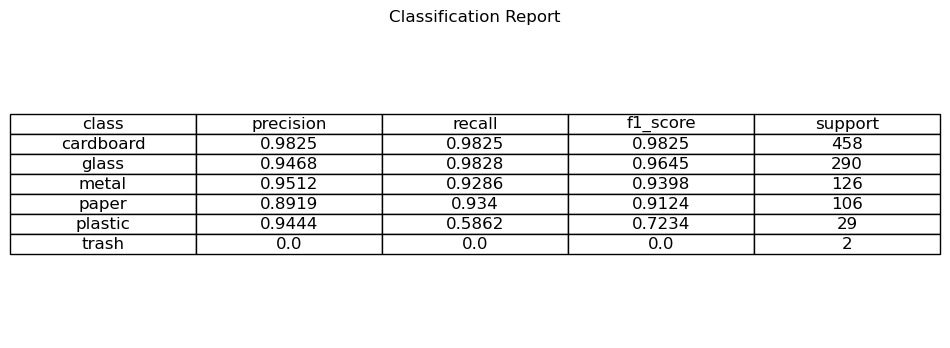

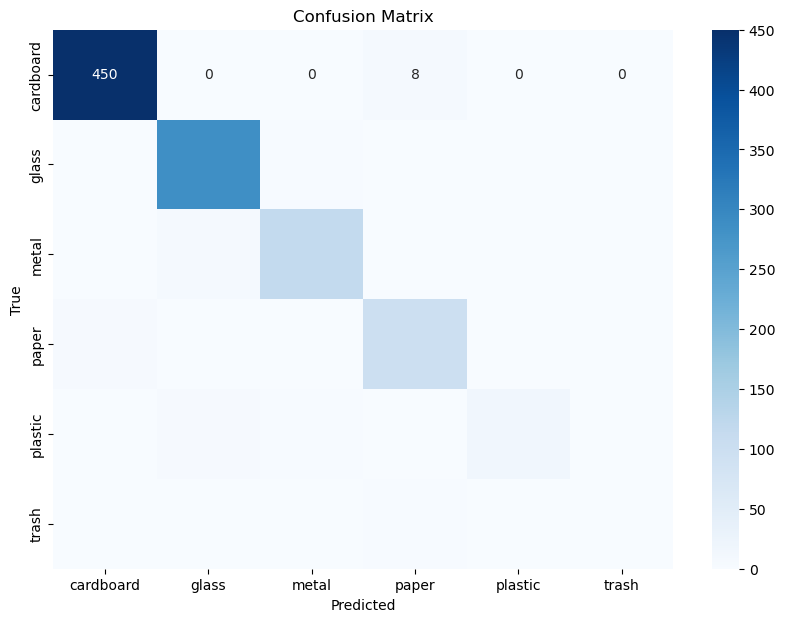

In [7]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



# EVALUATE AND VISUALIZE RESULTS
y_pred = new_model_denseNet169.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate classification report
report = classification_report(y_test, y_pred_classes, target_names=classes,digits=4)
print("Classification Report:")
print(report)

# Plot classification report
def plot_classification_report(report, title='Classification Report'):
    report_data = []
    lines = report.split('\n')
    for line in lines[2:-3]:
        row_data = line.split()
        if len(row_data) == 5:  # Check if the line contains all necessary data
            row = {}
            row['class'] = row_data[0]
            row['precision'] = float(row_data[1])
            row['recall'] = float(row_data[2])
            row['f1_score'] = float(row_data[3])
            row['support'] = int(row_data[4])
            report_data.append(row)
    dataframe = pd.DataFrame.from_dict(report_data)

    fig, ax = plt.subplots(1, 1, figsize=(10, 4))
    ax.axis('tight')
    ax.axis('off')
    table = ax.table(cellText=dataframe.values, colLabels=dataframe.columns, cellLoc='center', loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.2, 1.2)
    plt.title(title)
    plt.show()

plot_classification_report(report)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [6]:
#VISUALIZE TRAINING RESULT
# Evaluasi dan hitung metrik tambahan
y_pred =new_model_denseNet169.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print("Classification Report resNEt50V2:")
print(classification_report(y_test, y_pred_classes, target_names=classes , digits=4))

print("Confusion Matrix resNEt50V2:")

print(confusion_matrix(y_test, y_pred_classes))

32/32 [==============================] - 50s 1s/step
Classification Report resNEt50V2:
              precision    recall  f1-score   support

   cardboard     0.9825    0.9825    0.9825       458
       glass     0.9468    0.9828    0.9645       290
       metal     0.9512    0.9286    0.9398       126
       paper     0.8919    0.9340    0.9124       106
     plastic     0.9444    0.5862    0.7234        29
       trash     0.0000    0.0000    0.0000         2

    accuracy                         0.9575      1011
   macro avg     0.7862    0.7357    0.7538      1011
weighted avg     0.9559    0.9575    0.9553      1011

Confusion Matrix resNEt50V2:
[[450   0   0   8   0   0]
 [  1 285   3   0   1   0]
 [  0   8 117   1   0   0]
 [  6   1   0  99   0   0]
 [  1   7   3   1  17   0]
 [  0   0   0   2   0   0]]


c:\Users\bcamaster\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\bcamaster\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\bcamaster\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

In [144]:
#VISUALIZE TRAINING RESULT
# Evaluasi dan hitung metrik tambahan
y_pred = new_model_denseNet169.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print("Classification Report denseNet169:")
print(classification_report(y_test, y_pred_classes, target_names=classes)) 

print("Confusion Matrix denseNet169:")

print(confusion_matrix(y_test, y_pred_classes))

32/32 [==============================] - 46s 1s/step
Classification Report denseNet169:
              precision    recall  f1-score   support

   cardboard       0.98      0.99      0.98       462
       glass       0.94      0.99      0.96       278
       metal       0.93      0.93      0.93       134
       paper       0.95      0.91      0.93       104
     plastic       1.00      0.45      0.62        31
       trash       0.00      0.00      0.00         2

    accuracy                           0.96      1011
   macro avg       0.80      0.71      0.74      1011
weighted avg       0.96      0.96      0.95      1011

Confusion Matrix denseNet169:
[[459   0   0   3   0   0]
 [  0 275   3   0   0   0]
 [  3   6 125   0   0   0]
 [  7   0   2  95   0   0]
 [  1  12   4   0  14   0]
 [  0   0   0   2   0   0]]


c:\Users\bcamaster\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\bcamaster\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\bcamaster\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

32/32 [==============================] - 43s 1s/step


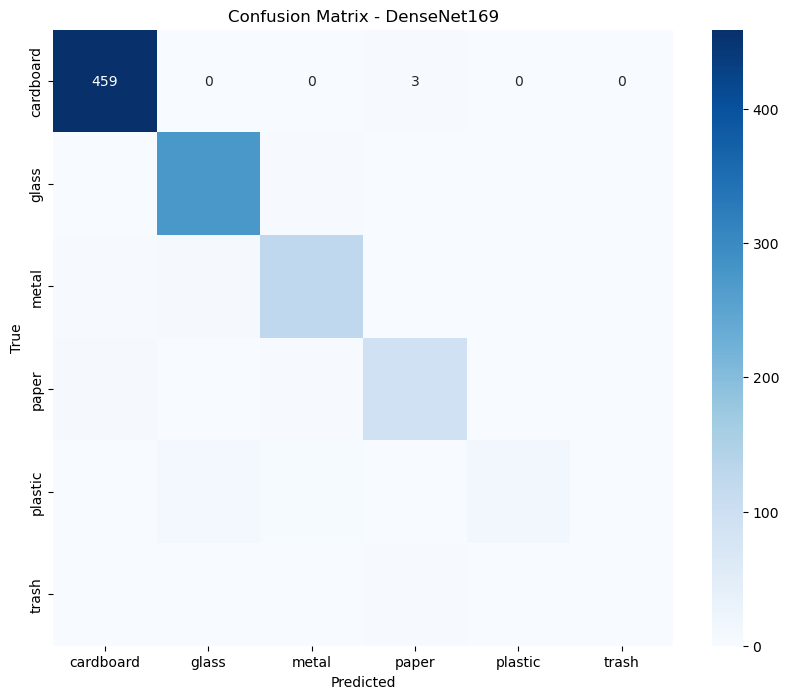

In [148]:
# Importing required libraries for visualization
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Get the predictions
y_pred = new_model_denseNet169.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - DenseNet169')
plt.show()

# **Data Preprocessing**

In [115]:
folder_path = "dataset/dataset"
os.listdir(folder_path)

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

In [116]:
classes=["cardboard","glass","metal","paper","plastic","trash"]

In [117]:
data=[]
for c in classes:
    i=classes.index(c)
    path=os.path.join(folder_path,c)
    for img in os.listdir(path):
        im=cv2.imread(os.path.join(path,img))
        im=cv2.resize(im,(224,224))
        data.append([im,i])

In [118]:
data=np.array(data , dtype="object")
import random
random.shuffle(data)

In [119]:
X=[]
Y=[]
for x,y in data:
    X.append(x)
    Y.append(y)

In [120]:
x=np.array(X)
y=np.array(Y)
print(x.shape,y.shape)

(2527, 224, 224, 3) (2527,)


In [121]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=4, stratify=y)


ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(1516, 224, 224, 3) (1516,)
(1011, 224, 224, 3) (1011,)


# **Build ResNet50V2 Model**

In [122]:
model_resNet50V2=tf.keras.applications.resnet_v2.ResNet50V2(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)

In [123]:
model_resNet50V2.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_12[0][0]']               
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                         

In [124]:
def model_arch(model_name):
    !mkdir images
    arch=IMAGE_PATH+'/fer-2013_'+model_name+'.png'
    return arch

In [126]:
from tensorflow.keras.utils import plot_model
plot_model(model_resNet50V2, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)
Image(filename='model_architecture.png')

# Plot the Model Diagram
# from sklearn import set_config
# model_name = "model_resNet50V2"
# set_config(display="diagram")
# from keras.utils.vis_utils import plot_model
# plot_model(model_resNet50V2, to_file=model_arch(model_name), show_shapes=True)
# from tensorflow.keras.utils import plot_model
# from IPython.display import Image
# plot_model(model_resNet50V2, to_file='convnet.png', show_shapes=True,show_layer_names=True)
# Image(filename='convnet.png')

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


NameError: name 'Image' is not defined

In [13]:
base_input2=model_resNet50V2.layers[0].input
base_output2=model_resNet50V2.layers[-2].output

final_output2 = layers.Dense(240)(base_output2) 
final_output2 = layers.Activation('relu')(final_output2) 
final_output2 = layers.Dense(128)(final_output2)
final_output2 = layers.Activation('relu')(final_output2)
final_output2 = layers.Dense(64)(final_output2)
final_output2 = layers.Activation('relu')(final_output2)
final_output2 = layers.Dense(6, activation='softmax')(final_output2) 

In [14]:
# def f1_score(y_true, y_pred): #taken from old keras source code
#     true_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true * y_pred, 0, 1)))
#     possible_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true, 0, 1)))
#     predicted_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_pred, 0, 1)))
#     precision = true_positives / (predicted_positives + K.epsilon())
#     recall = true_positives / (possible_positives + K.epsilon())
#     f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
#     return f1_val
def f1_score(y_true, y_pred):
    def recall(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    f1_val = 2 * ((precision * recall) / (precision + recall + K.epsilon()))
    return f1_val

In [15]:
METRICS = [
      # tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      # tf.keras.metrics.Precision(thresholds=0),
      # tf.keras.metrics.Recall(name='recall'),  
      # tf.keras.metrics.AUC(name='auc'),
      f1_score,
]

In [16]:
new_model_resNet50V2 = tf.keras.Model(inputs = base_input2, outputs = final_output2)

In [17]:
new_model_resNet50V2.compile(loss="sparse_categorical_crossentropy", optimizer = "SGD", metrics = METRICS)

# **Train ResNet50V2 Model**

In [ ]:
result=new_model_resNet50V2.fit(x_train, y_train, epochs = 20,validation_data=(x_test, y_test))

# **Build DenseNet169 Model**

In [121]:
model_denseNet169=tf.keras.applications.densenet.DenseNet169(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)

In [122]:
model_denseNet169.summary()

Model: "densenet169"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_14 (ZeroPadding  (None, 230, 230, 3)  0          ['input_8[0][0]']                
 2D)                                                                                              
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d_14[0][0]']      
                                )                                                       

In [123]:
base_input3=model_denseNet169.layers[0].input
base_output3=model_denseNet169.layers[-2].output

final_output3 = layers.Dense(240)(base_output3) 
final_output3 = layers.Activation('relu')(final_output3) 
final_output3 = layers.Dense(128)(final_output3) 
final_output3 = layers.Activation('relu')(final_output3) 
final_output3 = layers.Dense(64)(final_output3)
final_output3 = layers.Activation('relu')(final_output3)
final_output3 = layers.Dense(6, activation='softmax')(final_output3) 

In [124]:
new_model_denseNet169 = tf.keras.Model(inputs = base_input3, outputs = final_output3)

In [125]:
# def f1_score(y_true, y_pred):
#     y_pred = tf.argmax(y_pred, axis=-1)
#     y_true = tf.cast(y_true, tf.int32)

#     y_pred = tf.one_hot(y_pred, depth=tf.shape(y_pred)[-1])
#     y_true = tf.one_hot(y_true, depth=tf.shape(y_pred)[-1])

#     true_positives = tf.reduce_sum(tf.cast(y_true * y_pred, tf.float32), axis=0)
#     possible_positives = tf.reduce_sum(tf.cast(y_true, tf.float32), axis=0)
#     predicted_positives = tf.reduce_sum(tf.cast(y_pred, tf.float32), axis=0)

#     precision = true_positives / (predicted_positives + K.epsilon())
#     recall = true_positives / (possible_positives + K.epsilon())
#     f1_val = 2 * (precision * recall) / (precision + recall + K.epsilon())
#     return tf.reduce_mean(f1_val)

In [126]:
# class F1Score(tf.keras.metrics.Metric):
#     def __init__(self, name='f1_score', **kwargs):
#         super(F1Score, self).__init__(name=name, **kwargs)
#         self.f1 = self.add_weight(name='f1', initializer='zeros')

#     def update_state(self, y_true, y_pred, sample_weight=None):
#         f1 = f1_score(y_true, y_pred)
#         self.f1.assign(f1)

#     def result(self):
#         return self.f1

#     def reset_states(self):
#         self.f1.assign(0.0)

In [127]:
# METRICS = [
#     tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy'),
#     tf.keras.metrics.Precision(name='precision'),
#     tf.keras.metrics.Recall(name='recall'),
#     tf.keras.metrics.AUC(name='auc'),
#     # F1Score(name='f1_score')
# ]


In [128]:
new_model_denseNet169.compile(loss="sparse_categorical_crossentropy", optimizer = "SGD", metrics = ["accuracy"])
# new_model_denseNet169.compile(loss="binary_crossentropy", optimizer="SGD", metrics=METRICS)
# new_model_denseNet169.compile(loss="sparse_categorical_crossentropy", optimizer="SGD", metrics=METRICS)


# **Train DenseNet169 Model**

In [ ]:
result_D=new_model_denseNet169.fit(x_train, y_train, epochs = 20,validation_data=(x_test, y_test))
# result_D = new_model_denseNet169.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))
# result_D = new_model_denseNet169.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))


# **Build VGG19 Model**

In [86]:
model_vgg19=tf.keras.applications.vgg19.VGG19(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    pooling='avg',
    classes=1000,
    classifier_activation='softmax'
)

In [87]:
model_vgg19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [88]:

base_input4 = model_vgg19.input
base_output4 = model_vgg19.output

# Add custom layers
final_output4 = layers.Dense(240)(base_output4)
final_output4 = layers.Activation('relu')(final_output4)
final_output4 = layers.Dense(128)(final_output4)
final_output4 = layers.Activation('relu')(final_output4)
final_output4 = layers.Dense(64)(final_output4)
final_output4 = layers.Activation('relu')(final_output4)
final_output4 = layers.Dense(6, activation='softmax')(final_output4)

In [89]:
new_model_vgg19 = tf.keras.Model(inputs=base_input4, outputs=final_output4)

In [90]:
# Define custom F1 score metric
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.precision = tf.keras.metrics.Precision()
        self.recall = tf.keras.metrics.Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_pred = tf.argmax(y_pred, axis=1)
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def result(self):
        precision = self.precision.result()
        recall = self.recall.result()
        return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

    def reset_states(self):
        self.precision.reset_states()
        self.recall.reset_states()

In [91]:
# Compile the model with additional metrics
new_model_vgg19.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="SGD",
    metrics=["accuracy", tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall'), F1Score(name='f1_score')]
)

# **TrainVGG19 Model**

In [92]:
result_V=new_model_vgg19.fit(x_train, y_train, epochs = 20,validation_data=(x_test, y_test))

Epoch 1/20


ValueError: in user code:

    File "c:\Users\bcamaster\anaconda3\envs\myenv\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\bcamaster\anaconda3\envs\myenv\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\bcamaster\anaconda3\envs\myenv\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\bcamaster\anaconda3\envs\myenv\lib\site-packages\keras\engine\training.py", line 998, in train_step
        return self.compute_metrics(x, y, y_pred, sample_weight)
    File "c:\Users\bcamaster\anaconda3\envs\myenv\lib\site-packages\keras\engine\training.py", line 1092, in compute_metrics
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "c:\Users\bcamaster\anaconda3\envs\myenv\lib\site-packages\keras\engine\compile_utils.py", line 605, in update_state
        metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "c:\Users\bcamaster\anaconda3\envs\myenv\lib\site-packages\keras\utils\metrics_utils.py", line 77, in decorated
        update_op = update_state_fn(*args, **kwargs)
    File "c:\Users\bcamaster\anaconda3\envs\myenv\lib\site-packages\keras\metrics\base_metric.py", line 143, in update_state_fn
        return ag_update_state(*args, **kwargs)
    File "c:\Users\bcamaster\anaconda3\envs\myenv\lib\site-packages\keras\metrics\metrics.py", line 906, in update_state  **
        return metrics_utils.update_confusion_matrix_variables(
    File "c:\Users\bcamaster\anaconda3\envs\myenv\lib\site-packages\keras\utils\metrics_utils.py", line 674, in update_confusion_matrix_variables
        y_pred.shape.assert_is_compatible_with(y_true.shape)

    ValueError: Shapes (None, 6) and (None, 1) are incompatible
